# DATA PREPROCESSING

In [ ]:
#import library

In [4]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix ,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [ ]:
#read file 

In [5]:
data = pd.read_csv(r"C:\Users\likhi\Documents\sem2\rt\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
# view data

In [52]:
data.head()

,customerID,gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [ ]:
# check no of cases

In [4]:
data.shape

(7043, 21)

In [ ]:
#fill blank space

In [6]:
data.columns= data.columns.str.replace(" ","_")

In [ ]:
# see all features

In [ ]:
data.columns

Index(['customerID', 'gender', 'Senior_Citizen', 'Partner', 'Dependents',
       'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [6]:
for column in data:
    print('Column: {} - Unique Values: {}'.format(column, data[column].unique()))

Column: customerID - Unique Values: ['4472-LVYGI' '3115-CZMZD' '5709-LVOEQ' ... '7203-OYKCT' '2569-WGERO'
 '2234-XADUH']
Column: gender - Unique Values: ['Female' 'Male']
Column: Senior_Citizen - Unique Values: ['No' 'Yes']
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['Yes' 'No']
Column: Tenure_Months - Unique Values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Column: Phone_Service - Unique Values: ['No' 'Yes']
Column: Multiple_Lines - Unique Values: ['No phone service' 'No' 'Yes']
Column: Internet_Service - Unique Values: ['DSL' 'No' 'Fiber optic']
Column: Online_Security - Unique Values: ['Yes' 'No internet service' 'No']
Column: Online_Backup - Unique Values: ['No' 'No internet service' 'Yes']
Column: Device_Protection - Unique Values: ['Yes' 'No internet service' 'No

In [ ]:
# missing data 

In [101]:
data.loc[data['Total_Charges']== " "]

,gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Number_Additional_Services


In [ ]:
# impute missing data

In [7]:
data.loc[(data['Total_Charges'] == " " ,"Total_Charges")]= 0

In [ ]:
# data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Senior_Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure_Months      7043 non-null   int64  
 6   Phone_Service      7043 non-null   object 
 7   Multiple_Lines     7043 non-null   object 
 8   Internet_Service   7043 non-null   object 
 9   Online_Security    7043 non-null   object 
 10  Online_Backup      7043 non-null   object 
 11  Device_Protection  7043 non-null   object 
 12  Tech_Support       7043 non-null   object 
 13  Streaming_TV       7043 non-null   object 
 14  Streaming_Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless_Billing  7043 

In [ ]:
# convert data to numeric

In [8]:
data['Total_Charges'] = pd.to_numeric(data['Total_Charges'],errors= "coerce")

In [ ]:
# check outliers

In [56]:
num_features= ['Tenure_Months', 'Monthly_Charges', 'Total_Charges']
df_num = data[num_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

Tenure_Months      False
Monthly_Charges    False
Total_Charges      False
dtype: bool

In [ ]:
# remove customerid

In [9]:
data = data.drop(['customerID'], axis=1)

In [10]:
df = data.drop(['Churn'], axis=1)

In [ ]:
# feature engineering

In [11]:
data['Number_Additional_Services'] = (data[['Online_Security', 'Device_Protection', 'Streaming_Movies', 'Tech_Support', 'Streaming_TV', 'Online_Backup']] == 'Yes').sum(axis=1)

# DATA VISUALIZATION

In [ ]:
# done in tableau

# DATA MODELING

In [ ]:
#labeling data

In [12]:
data["Churn"]= data["Churn"].map({"Yes":1,"No":0})

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
categ = [ "gender"  ,"Senior_Citizen",    "Partner"       ,  "Dependents"   ,   "Phone_Service"  ,   "Multiple_Lines"   ,   "Internet_Service" , "Online_Security", "Online_Backup" ,"Device_Protection", "Tech_Support" ,"Streaming_TV" ,"Streaming_Movies", "Contract" ,"Paperless_Billing" ,"Payment_Method"]

# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [15]:
data

,gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Number_Additional_Services
0,0,0,1,1,0,0,1,0,2,0,...,2,2,0,2,1,0,52.55,0.00,0,4
1,1,0,0,1,0,1,0,2,1,1,...,1,1,1,2,0,3,20.25,0.00,0,0
2,0,0,1,1,0,1,0,0,2,2,...,0,2,2,2,0,3,80.85,0.00,0,5
3,1,0,1,1,0,1,2,2,1,1,...,1,1,1,2,0,3,25.75,0.00,0,0
4,0,0,1,1,0,0,1,0,2,2,...,2,2,0,2,0,1,56.05,0.00,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,72,1,0,0,2,2,...,2,0,2,2,1,2,74.35,5237.40,0,5
7039,1,1,1,0,72,0,1,0,2,2,...,2,2,2,2,1,0,63.10,4685.55,0,6
7040,1,0,0,0,72,1,2,1,0,2,...,0,2,2,1,1,2,104.95,7544.30,0,4
7041,0,0,0,0,72,1,0,2,1,1,...,1,1,1,2,1,0,21.15,1419.40,0,0


In [ ]:
#relationship of data with churn

C:\Users\likhi\AppData\Local\Temp\ipykernel_5436\1786798597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Churn"].sort_values(ascending = False).plot(kind='bar')


<AxesSubplot: >

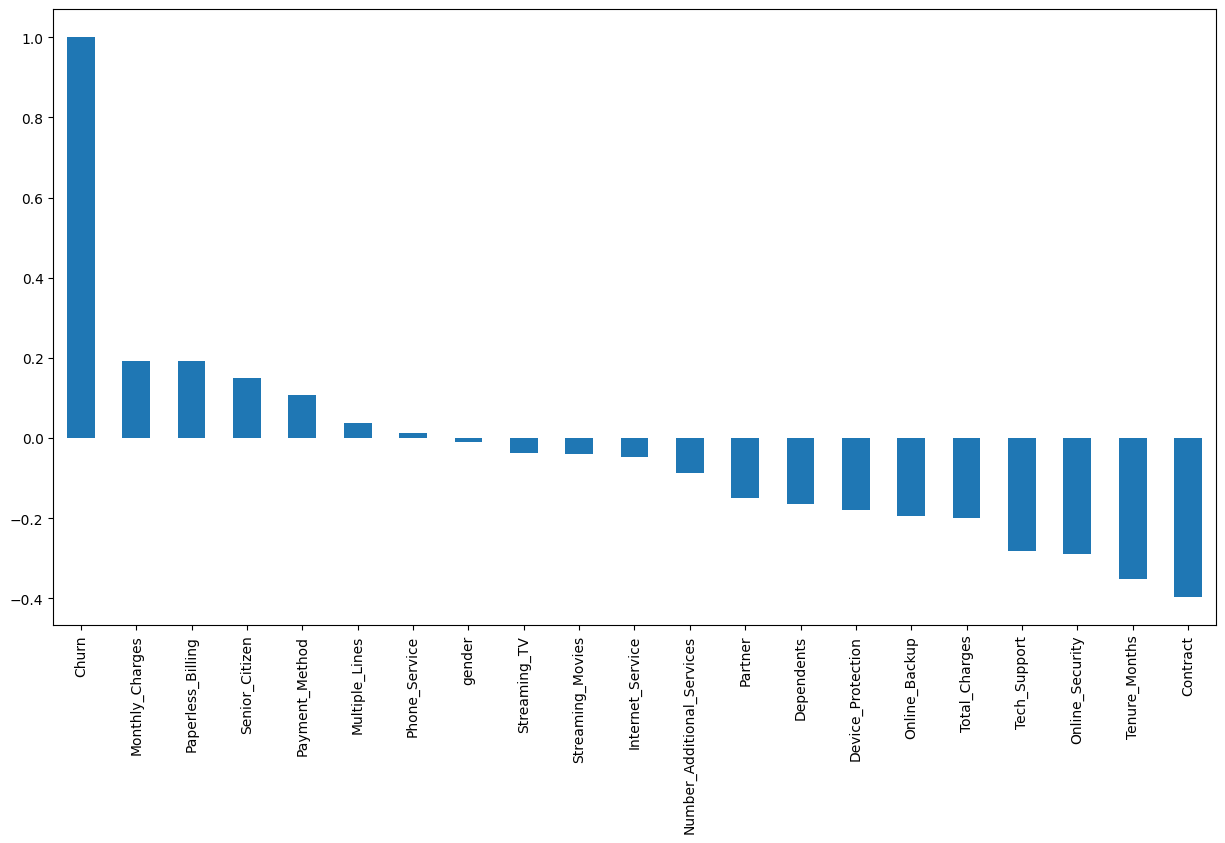

In [19]:
plt.figure(figsize=(15,8))
data.corr()["Churn"].sort_values(ascending = False).plot(kind='bar')

In [ ]:
# senior citizen, monthly contract ,non automatic payment method,monthly charges are affecting churn proportionaly
# gender , phone service, streaming services doesnt affect churn
# online security and backup ,dependent, patners,automatic payment methods,total charges, tenure months, yearly contracts are affecting churn inversly

In [ ]:
#scaling data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
columns_to_scale = ['Tenure_Months', 'Monthly_Charges', 'Total_Charges']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [ ]:
# seprate variables

In [18]:
X = data.drop(["Churn"],axis=1)
y = data['Churn']

In [66]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
#split data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X, y)

# knn

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier()

In [76]:
model_knn=knn.fit(X_train,y_train)

In [77]:
pred = knn.predict(X_test)

In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1035
           1       0.55      0.51      0.53       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [102]:
model_knn.score(X_train, y_train), model_knn.score(X_test, y_test)

(0.8409655662051828, 0.758694109297374)

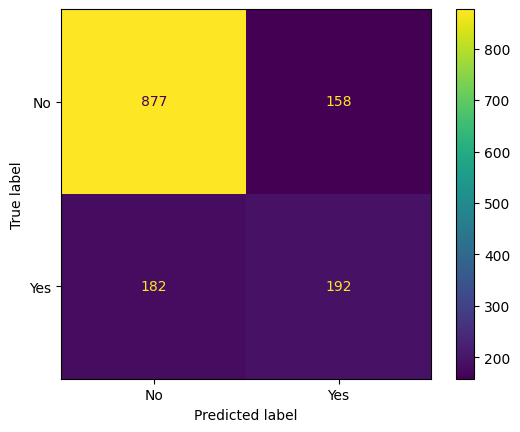

In [182]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,pred), display_labels = ["No", "Yes"]).plot()

# random forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc = RandomForestClassifier()

In [92]:
model_rfc=rfc.fit(X_train,y_train)

In [93]:
pred = rfc.predict(X_test)

In [94]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



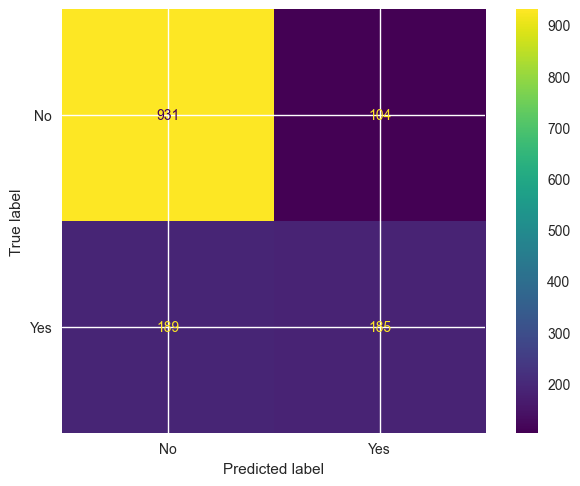

In [95]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,pred), display_labels = ["No", "Yes"]).plot()

# logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lor = LogisticRegression()

In [86]:
model_lor=lor.fit(X_train,y_train)

In [67]:
pred = lor.predict(X_test)

In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [103]:
model_lor.score(X_train, y_train), model_lor.score(X_test, y_test)

(0.8019169329073482, 0.801277501774308)

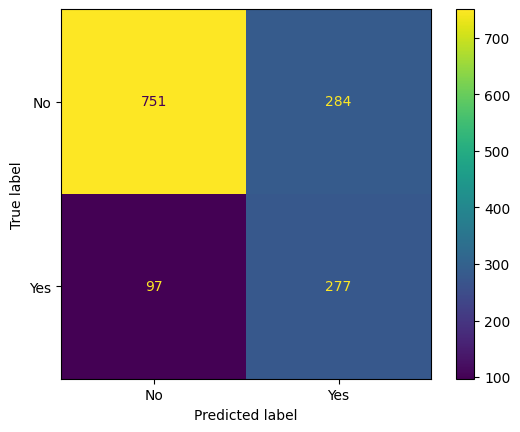

In [189]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,pred), display_labels = ["No", "Yes"]).plot()

# gradiant boost

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbc = GradientBoostingClassifier()

In [63]:
model_gbc = gbc.fit(X_train,y_train)

In [64]:
pred = gbc.predict(X_test)

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



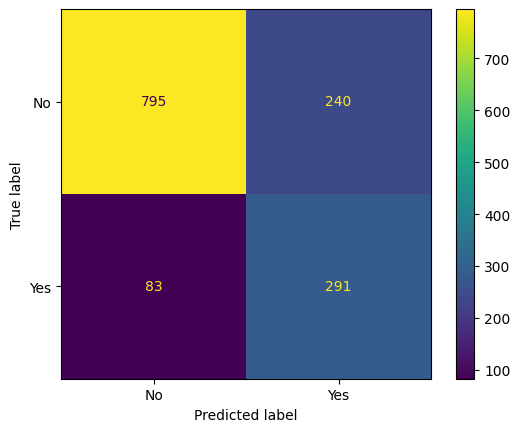

In [196]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,pred), display_labels = ["No", "Yes"]).plot()

In [87]:
pred_prob_lr = model_lor.predict_proba(X_test)
pred_prob_kn = model_knn.predict_proba(X_test)
pred_prob_rf = model_rfc.predict_proba(X_test)
pred_prob_gb = model_gbc.predict_proba(X_test)


from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_kn[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_gb[:,1], pos_label=1)


random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob_lr[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob_kn[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob_rf[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob_gb[:,1])

print(auc_score1 , auc_score2, auc_score3, auc_score4)

0.8307615799943165 0.7493270298896897 0.8143752098995066 0.834871735255367


C:\Users\likhi\AppData\Local\Temp\ipykernel_13384\3454952452.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


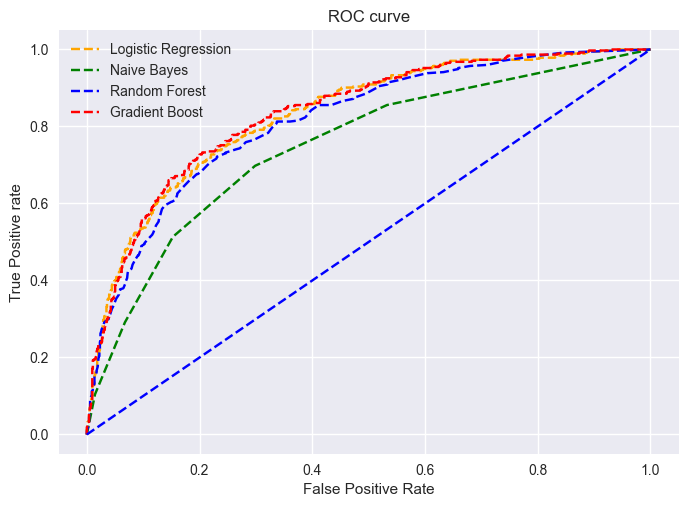

In [88]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Gradient Boost')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

<AxesSubplot: >

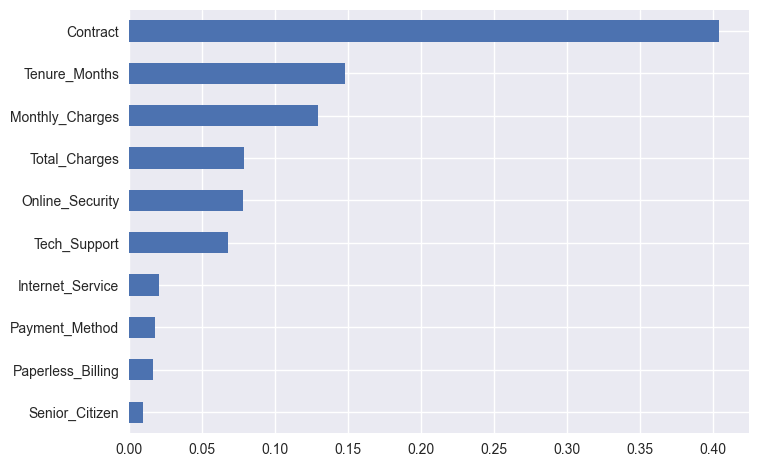

In [105]:
importances =model_gbc.feature_importances_
weights =pd.Series(importances,index =X.columns.values)
weights.sort_values()[-10:].plot(kind="barh")